In [ ]:
#import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans as sklearnKMeans

In [ ]:
df_train = pd.read_csv("kendaraan_train.csv")
df_test = pd.read_csv("kendaraan_test.csv")

df_concat = (df_train, df_test)
df_kendaraan = pd.concat (df_concat)

df_kendaraan


,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2.0,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3.0,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4.0,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5.0,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47634,NaN,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0,0
47635,NaN,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0,0
47636,NaN,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0,0
47637,NaN,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0,1


In [ ]:
df_kendaraan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333470 entries, 0 to 47638
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  float64
 1   Jenis_Kelamin      319030 non-null  object 
 2   Umur               319256 non-null  float64
 3   SIM                319066 non-null  float64
 4   Kode_Daerah        319164 non-null  float64
 5   Sudah_Asuransi     319241 non-null  float64
 6   Umur_Kendaraan     319195 non-null  object 
 7   Kendaraan_Rusak    319282 non-null  object 
 8   Premi              318901 non-null  float64
 9   Kanal_Penjualan    319171 non-null  float64
 10  Lama_Berlangganan  319478 non-null  float64
 11  Tertarik           333470 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 33.1+ MB


In [ ]:
df_kendaraan.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,319256.000000,319066.000000,319164.000000,319241.000000,318901.000000,319171.000000,319478.000000,333470.000000
mean,142916.000000,38.840028,0.997859,26.394380,0.458603,30550.097899,112.045299,154.310350,0.122551
std,82512.446734,15.526398,0.046217,13.246852,0.498284,17192.548724,54.196470,83.686932,0.327921
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24397.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31660.000000,133.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39392.000000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# #pengambilan kolom Umur dan Sudah_Asuransi
# df_cluster = df_kendaraan.loc[:,["Umur", "Kanal_Penjualan"]]
# df_cluster.info()
# df_cluster = df_cluster.iloc[:10000]

# data_hilang = df_cluster.isnull()
# for column in data_hilang.columns.values.tolist():
#   print(column)
#   print(data_hilang[column].value_counts())
#   print(" ")

In [ ]:
# df_kendaraan.isna().sum()

In [ ]:
# new_df_kendaraan = df_kendaraan
# new_df_kendaraan.dropna(inplace=True)
# new_df_kendaraan = new_df_kendaraan.reset_index(drop=True)

In [ ]:

# new_df_kendaraan.isnull().sum()
# new_df_kendaraan

In [ ]:
new_df_kendaraan = df_kendaraan.drop(columns=['id', 'Tertarik'])

In [ ]:
new_df_kendaraan

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0
...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61.0,1.0,46.0,0.0,> 2 Tahun,Pernah,31039.0,124.0,67.0
47635,Pria,41.0,1.0,15.0,0.0,1-2 Tahun,Pernah,2630.0,157.0,232.0
47636,Pria,24.0,1.0,29.0,1.0,< 1 Tahun,Tidak,33101.0,152.0,211.0
47637,Pria,59.0,1.0,30.0,0.0,1-2 Tahun,Pernah,37788.0,26.0,239.0


In [ ]:
new_df_kendaraan.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [ ]:
#mengganti nilai null dengan mean dam modus
new_df_kendaraan['Jenis_Kelamin'] = new_df_kendaraan['Jenis_Kelamin'].fillna(new_df_kendaraan['Jenis_Kelamin'].mode()[0])
new_df_kendaraan['Umur'] = new_df_kendaraan['Umur'].fillna(new_df_kendaraan['Umur'].mean())
new_df_kendaraan['SIM'] = new_df_kendaraan['SIM'].fillna(new_df_kendaraan['SIM'].mode()[0])
new_df_kendaraan['Kode_Daerah'] = new_df_kendaraan['Kode_Daerah'].fillna(new_df_kendaraan['Kode_Daerah'].mode()[0])
new_df_kendaraan['Sudah_Asuransi'] = new_df_kendaraan['Sudah_Asuransi'].fillna(new_df_kendaraan['Sudah_Asuransi'].mode()[0])
new_df_kendaraan['Umur_Kendaraan'] = new_df_kendaraan['Umur_Kendaraan'].fillna(new_df_kendaraan['Umur_Kendaraan'].mode()[0])
new_df_kendaraan['Kendaraan_Rusak'] = new_df_kendaraan['Kendaraan_Rusak'].fillna(new_df_kendaraan['Kendaraan_Rusak'].mode()[0])
new_df_kendaraan['Premi'] = new_df_kendaraan['Premi'].fillna(new_df_kendaraan['Premi'].mean())
new_df_kendaraan['Kanal_Penjualan'] = new_df_kendaraan['Kanal_Penjualan'].fillna(new_df_kendaraan['Kanal_Penjualan'].mode()[0])
new_df_kendaraan['Lama_Berlangganan'] = new_df_kendaraan['Lama_Berlangganan'].fillna(new_df_kendaraan['Lama_Berlangganan'].mean())

In [ ]:
# new_df_kendaraan2 = new_df_kendaraan.fillna(new_df_kendaraan.mean())

In [ ]:
new_df_kendaraan.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [ ]:
def get_label(data) :
    conditions = []
    choices = []
    for idx, val in enumerate(data.unique()):
        conditions.append(data.str.contains(val))
        choices.append(idx)
    
    return np.select(conditions, choices)

In [ ]:
#labelling data
new_df_kendaraan["Jenis_Kelamin"] = get_label(new_df_kendaraan["Jenis_Kelamin"])

new_df_kendaraan["Umur_Kendaraan"] = get_label(new_df_kendaraan["Umur_Kendaraan"])

new_df_kendaraan["Kendaraan_Rusak"] = get_label(new_df_kendaraan["Kendaraan_Rusak"])


In [ ]:
new_df_kendaraan.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0
1,1,48.0,1.0,39.0,0.0,1,1,25800.0,29.0,158.0
2,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0
3,0,58.0,1.0,48.0,0.0,2,0,2630.0,124.0,63.0
4,1,50.0,1.0,35.0,0.0,1,1,34857.0,88.0,194.0


In [ ]:
# labelling_data = {'Jenis_Kelamin' : {'Wanita' : 0, 'Pria' : 1},
#                   'Umur_Kendaraan' : {'1-2 Tahun':0, '< 1 Tahun' : 1, '> 2 Tahun' : 2 },
#                   'Kendaraan_Rusak' : {'Pernah':1, 'Tidak':0}}

In [ ]:
# new_df_kendaraan = new_df_kendaraan.replace(labelling_data)
# new_df_kendaraan.describe()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(new_df_kendaraan[['Lama_Berlangganan']])
# new_df_kendaraan['Lama_Berlangganan'] = scaler.transform(new_df_kendaraan[['Lama_Berlangganan']])

# scaler.fit(new_df_kendaraan[['Kode_Daerah']])
# new_df_kendaraan['Kode_Daerah'] = scaler.transform(new_df_kendaraan[['Kode_Daerah']])

In [ ]:
new_df_kendaraan=(new_df_kendaraan-new_df_kendaraan.mean())/new_df_kendaraan.std()

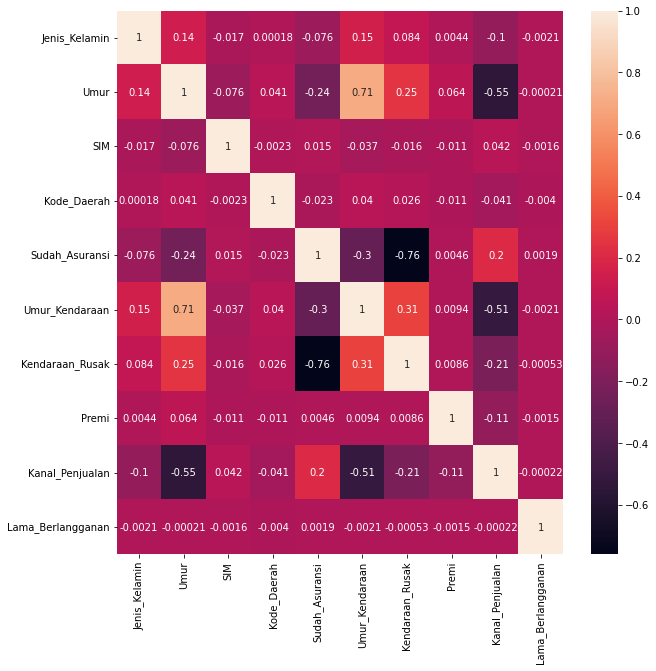

In [ ]:
df_corel = new_df_kendaraan.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corel, annot = True, ax = ax)

Text(0, 0.5, 'Umur_Kendaraan')

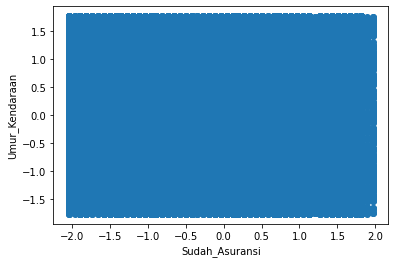

In [ ]:
plt.scatter(new_df_kendaraan.Kode_Daerah, new_df_kendaraan.Lama_Berlangganan)
plt.xlabel('Sudah_Asuransi')
plt.ylabel('Umur_Kendaraan')

In [ ]:
#pengambilan kolom Kode_daerah dan  Lama_Berlangganan

df_cluster = ["Kode_daerah", " Lama_Berlangganan"]
df_cluster_data = new_df_kendaraan[df_cluster].to_numpy()

In [ ]:
# class kMeans :
#   def euclideanDist(d1,d2):
#     return np.sqrt(np.sum((d1-d2)**2))

#   def random_centroid(df,k):
#     random_idx = [np.random.randint(len(df)) for i in range(k)]
#     centroids = []
#     for i in random_idx:
#       centroids.append(df.iloc[i].tolist())
#     return np.asarray(centroids)

#   def DOC(df,centroids,k):
#     save_pca = []
#     for i in range(len(df)):
#       euc_d = []
#       for j in range(k):
#         euc_d.append(euclideanDist(df.iloc[i].tolist(),centroids[j]))
#       save_pca.append(euc_d)
#     return np.asarray(save_pca)

#   def assign_cluster(df,centroids,k):
#     cluster = []
#     for i in range(len(df)):
#       euc_d = []
#       for j in range(k):
#         euc_d.append(euclideanDist(df.iloc[i],centroids[j]))
#       idx = np.argmin(euc_d)
#       cluster.append(idx)
#     return np.asarray(cluster)


# def compute_centroid(df,cluster,k):
#   centroid = []
#   for i in range(k):
#     temp_arr = []
#     for j in range(len(df)):
#       if (cluster[j]==i).all():
#         temp_arr.append(df.iloc[j].tolist())
#     if (len(temp_arr)!=0):
#       centroid.append(np.mean(temp_arr,axis=0))
#     else:
#       centroid.append([0]*df.shape[1])
#   return np.asarray(centroid)

# def inputDOC(new_df2_kendaraan,centroids,cluster,k):
#   new_df2_kendaraan = copy.deepcopy(new_df2_kendaraan)
#   doc = DOC(new_df2_kendaraan,centroids,k)
#   for j in range(k):
#     new_df2_kendaraan['D(O,C{})'.format(j+1)] = [doc[i][j] for i in range(len(doc))]
    
#   new_df2_kendaraan['Cluster'] = cluster
#   return new_df2_kendaraan

# def clusterisasi(df_k_Means,k):
#   cek = True
#   centroid = random_centroid(k_Means,k)
#   new_df2_kendaraan = copy.deepcopy(k_Means)
#   while (cek):
#     oldcentroid = copy.deepcopy(centroid)
#     cluster = assign_cluster(new_df2_kendaraan,centroid,k) 
#     centroid = compute_centroid(new_df2_kendaraan,cluster,k)
#     if (oldcentroid==centroid).all():
#       cek = False
#   return np.asarray(centroid),np.asarray(cluster+1)

In [ ]:
class k_means:
    def __init__(self, K, max_iteration=15, tolerance=0.00012,):
        self.K = K
        self.max_iteration = max_iteration
        self.tolerence = tolerance

    def _init_centroids(self, data):
      # Inisiasi empty cluster
        centroids = {}
        # Set rentang nilai k
        for i in range(self.K):
            centroids[i] = data[random.randint(0, len(data) - 1)]
        return centroids

    # Menetukan Jarak Data
    def _euclidean(self, x, y):
        return np.sqrt(sum((x - y)**2))

    def _init_clusters(self):
        clusters = {}
        for i in range(self.K):
            clusters[i] = []
        return clusters

    def _calculate_centroids(self, data):
        for val in self.clusters:
            if not self.clusters[val] :
                self.centroids[val] = self._init_centroids(data)[0]
            else :
                self.centroids[val] = np.mean(self.clusters[val], axis=0)

    def _calculate_distance(self, data):
        for val in data:
            distMinIndex = self.predict(val)
            self.clusters[distMinIndex].append(val)
    
    def fit(self, data):
        self.centroids = self._init_centroids(data)
        for i in range(self.max_iteration):
            old_centroids = self.centroids.copy()
            self.clusters = self._init_clusters()
            self._calculate_distance(data)
            self._calculate_centroids(data)

            optimized = True

            for i in self.centroids:
                current_centroid = self.centroids[i]
                old_centroid = old_centroids[i]
                if np.sum((current_centroid - old_centroid) / old_centroid * 100.0) > self.tolerence:
                    optimized = False
                    
            if optimized:
                break
            
    def predict(self, data):
        dist = []
        for c in self.centroids:
            dist.append(self._euclidean(data, self.centroids[c]))
        distMinIndex = dist.index(min(dist))
        return distMinIndex

In [ ]:
# class K_Means:
#     def __init__(self, k=3, tol=0.001, max_iter=300):
#         self.k = k
#         self.tol = tol
#         self.max_iter = max_iter

#     def fit(self, data):

#         self.centroids = {}

#         for i in range(self.k):
#             self.centroids[i] = data[i]

#         for i in range(self.max_iter):
#             self.classifications = {}

#             for i in range(self.k):
#                 self.classifications[i] = []

#             for featureset in data:
#                 distances = [np.linalg.norm(
#                     featureset-self.centroids[centroid]) for centroid in self.centroids]
#                 classification = distances.index(min(distances))
#                 self.classifications[classification].append(featureset)

#             prev_centroids = dict(self.centroids)

#             for classification in self.classifications:
#                 self.centroids[classification] = np.average(
#                     self.classifications[classification], axis=0)

#             optimized = True

#             for c in self.centroids:
#                 original_centroid = prev_centroids[c]
#                 current_centroid = self.centroids[c]
#                 if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
#                     print(np.sum((current_centroid-original_centroid) /
#                                  original_centroid*100.0))
#                     optimized = False

#             if optimized:
#                 break

#     def predict(self, data):
#         distances = [np.linalg.norm(data-self.centroids[centroid])
#                      for centroid in self.centroids]
#         classification = distances.index(min(distances))
#         return classification

In [ ]:
# Menetukan Jumlah Centroid
k = 2
kmeans = k_means(k)
kmeans.fit(df_cluster_data)

In [ ]:
# Melihat posisi centroid
for i in range(k):
    print(f'Centroid {i+1} :', kmeans.centroids[i])

Centroid 1 : [0.09634785 0.57325783]
Centroid 2 : [-0.2764749  -1.64499148]


In [ ]:
# df1 = new_df_kendaraan[new_df_kendaraan.k_means==0]
# df2 = new_df_kendaraan[new_df_kendaraan.k_means==1]
# df3 = new_df_kendaraan[new_df_kendaraan.k_means==2]
# plt.scatter(df1.Age,df1['Income($)'],color='green')
# plt.scatter(df2.Age,df2['Income($)'],color='red')
# plt.scatter(df3.Age,df3['Income($)'],color='black')
# plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],color='purple',marker='*',label='centroid')
# plt.legend()

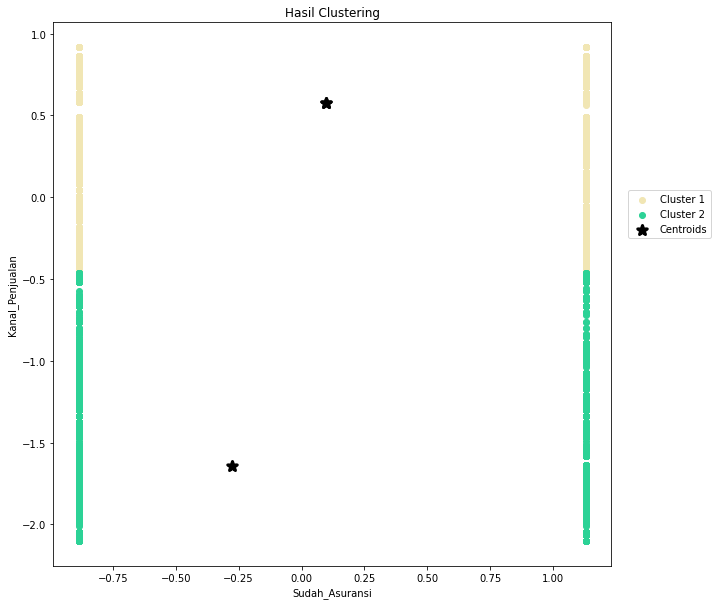

In [ ]:
#Visualisasi Centroid
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(k)]

plt.figure(figsize=(10, 10))
plt.title('Hasil Clustering')

for cluster in kmeans.clusters:
    data = np.array(kmeans.clusters[cluster])
    x, y = data.T
    plt.scatter(
        x,
        y,
        color=colors[cluster],
        label=f'Cluster {cluster + 1}'
    )

for centroid in kmeans.centroids:
    plt.scatter(kmeans.centroids[centroid][0], kmeans.centroids[centroid][1], color='k', marker='*', s=100, linewidths=3)
plt.scatter(kmeans.centroids[0][0], kmeans.centroids[0][1], label="Centroids", color='k', marker='*', s=100, linewidths=3)


plt.xlabel(df_cluster[0])
plt.ylabel(df_cluster[1])
plt.legend(loc='best', bbox_to_anchor=(1.02,0.7))
plt.show()

In [ ]:
# k_range = range(1, 10)
# SSE = []
# for K in k_range:
#     km = k_means(K=k)
#     km.fit(new_df_kendaraan[['Kode_Daerah','Lama_Berlangganan']])
#     sse.append(km.inertia_)

In [ ]:
#elbow method
elbow = []

K = range(1, 10)

for i in K:
    kmeans = k_means(i, max_iteration=2)
    kmeans.fit(df_cluster_data)
    elbow.append(sum(np.min(cdist(df_cluster_data, list(kmeans.centroids.values()),'euclidean'), axis=1)) / new_df_kendaraan[df_cluster].shape[0])
print(elbow)

[1.3679929868013523, 0.9944675097317726, 0.5546285784413031, 0.5788400487652531, 0.13420894560254934, 0.12191425177602336, 0.09431822178371696, 0.0768123862734025, 0.052854980280172104]


In [ ]:
# from scipy.spatial.distance 
# import cdist

# distortions = []

# K = range(1, 10)

# for i in K:
#     kmeans = KMeans(i)
#     kmeans.fit(selected_data)
#     distortions.append(sum(np.min(cdist(selected_data, list(kmeans.centroids.values()),'euclidean'), axis=1)) / df[selected_data_col].shape[0])
# print(distortions)

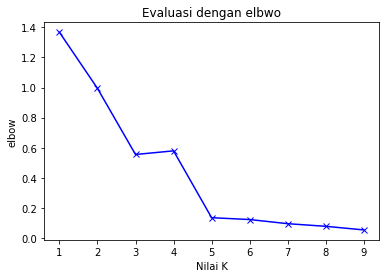

In [ ]:
# Plot data pada elbow method
plt.plot(K, elbow, 'bx-')
plt.xlabel('Nilai K')
plt.ylabel('elbow')
plt.title('Evaluasi dengan elbwo')
plt.show()